In [ ]:
!pip install --upgrade tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
! pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
! mkdir ~/.kaggle

In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download mlg-ulb/creditcardfraud

 86% 57.0M/66.0M [00:00<00:00, 178MB/s]
100% 66.0M/66.0M [00:00<00:00, 179MB/s]


In [ ]:
import zipfile

def unzip_file(zip_path, extract_path):
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_path)

# Example usage
zip_file_path = 'creditcardfraud.zip'
extract_directory = 'DatasetsFile/'
unzip_file(zip_file_path, extract_directory)


In [ ]:
import pandas as pd
import numpy as np
import keras
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import tensorflow as tf
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report


In [ ]:
import pandas as pd
data= pd.read_csv('DatasetsFile/creditcard.csv', delimiter = ",")
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [ ]:
#import pandas as pd
#data= pd.read_csv('creditcard.csv', delimiter = ";")
#data

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [ ]:
# checking the number of missing values in each column
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [ ]:
data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [ ]:
#histograms
#data.hist(bins=30, figsize=(30, 30))

In [ ]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [ ]:
#fixing time and amount
#time
from sklearn.preprocessing import RobustScaler
new_df = data.copy()
new_df['Amount'] = RobustScaler().fit_transform(new_df['Amount'].to_numpy().reshape(-1, 1))
time = new_df['Time']
new_df['Time'] = (time - time.min()) / (time.max() - time.min())
new_df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.000000,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,1.783274,0
1,0.000000,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.269825,0
2,0.000006,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,4.983721,0
3,0.000006,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,1.418291,0
4,0.000012,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0.670579,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,0.999965,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,-0.296653,0
284803,0.999971,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,0.038986,0
284804,0.999977,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,0.641096,0
284805,0.999977,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,-0.167680,0


count    284807.000000
mean          0.927124
std           3.495006
min          -0.307413
25%          -0.229162
50%           0.000000
75%           0.770838
max         358.683155
Name: Amount, dtype: float64

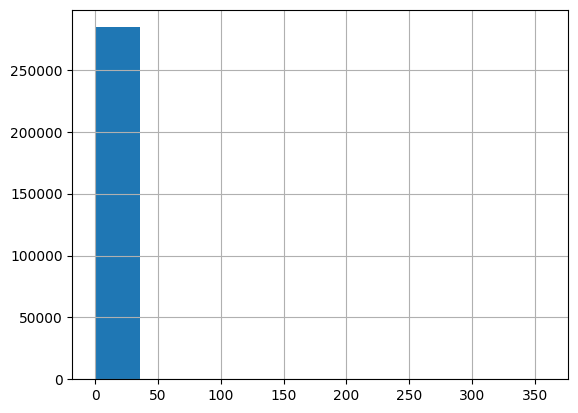

In [ ]:
new_df['Amount'].hist()
new_df['Amount'].describe()

count    284807.000000
mean          0.548717
std           0.274828
min           0.000000
25%           0.313681
50%           0.490138
75%           0.806290
max           1.000000
Name: Time, dtype: float64

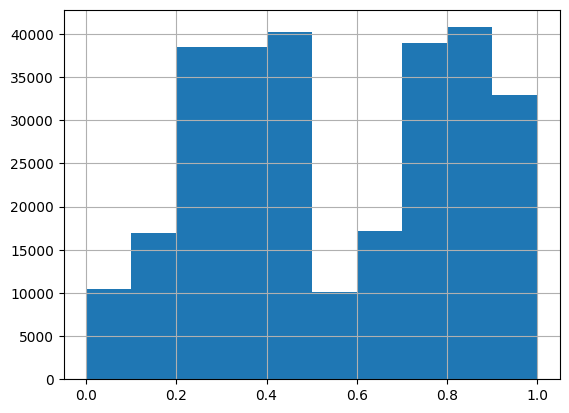

In [ ]:
new_df['Time'].hist()
new_df['Time'].describe()

In [ ]:
#number of fraudulent and non fraudulent transaction
data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [ ]:
new_df = new_df.sample(frac=1, random_state=1)
new_df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
169876,0.693938,-0.611712,-0.769705,-0.149759,-0.224877,2.028577,-2.019887,0.292491,-0.523020,0.358468,...,-0.075208,0.045536,0.380739,0.023440,-2.220686,-0.201146,0.066501,0.221180,-0.282401,0
127467,0.453377,-0.814682,1.319219,1.329415,0.027273,-0.284871,-0.653985,0.321552,0.435975,-0.704298,...,-0.128619,-0.368565,0.090660,0.401147,-0.261034,0.080621,0.162427,0.059456,-0.279746,0
137900,0.476770,-0.318193,1.118618,0.969864,-0.127052,0.569563,-0.532484,0.706252,-0.064966,-0.463271,...,-0.305402,-0.774704,-0.123884,-0.495687,-0.018148,0.121679,0.249050,0.092516,-0.294977,0
21513,0.183556,-1.328271,1.018378,1.775426,-1.574193,-0.117696,-0.457733,0.681867,-0.031641,0.383872,...,-0.220815,-0.419013,-0.239197,0.009967,0.232829,0.814177,0.098797,-0.004273,-0.084119,0
134700,0.468326,1.276712,0.617120,-0.578014,0.879173,0.061706,-1.472002,0.373692,-0.287204,-0.084482,...,-0.160161,-0.430404,-0.076738,0.258708,0.552170,0.370701,-0.034255,0.041709,-0.296793,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21440,0.183261,-2.986845,-8.663978,-1.910863,0.664058,-3.934875,0.861269,1.647511,-0.480963,-1.546866,...,1.252092,-0.993085,-2.173147,0.145570,-0.235062,-0.227411,-0.382702,0.404045,32.002515,0
117583,0.432480,0.937083,-0.849673,0.524186,-0.020031,-0.606327,0.692302,-0.463724,0.148857,0.785062,...,-0.143322,-0.479981,-0.237902,-0.715247,0.251418,0.975406,-0.060168,0.023771,2.086495,0
73349,0.318852,-1.149963,1.696462,1.637114,2.658991,-0.021502,0.192287,0.205204,0.588754,-1.187820,...,0.025147,0.086506,-0.262748,0.321538,0.341667,0.210343,-0.162047,0.031193,-0.201495,0
267336,0.941757,1.754554,-0.699398,-0.076332,0.443915,-0.672082,0.389061,-0.807534,0.202915,0.858635,...,0.141950,0.358412,0.259748,0.746839,-0.560808,0.104636,-0.005853,-0.019622,1.017257,0


**SVM**

In [ ]:
train, test, val = new_df[:240000], new_df[240000:262000], new_df[262000:]
train['Class'].value_counts(), test['Class'].value_counts(), val['Class'].value_counts()

(0    239589
 1       411
 Name: Class, dtype: int64,
 0    21955
 1       45
 Name: Class, dtype: int64,
 0    22771
 1       36
 Name: Class, dtype: int64)

In [ ]:
train_np, test_np, val_np = train.to_numpy(), test.to_numpy(), val.to_numpy()
train_np.shape, test_np.shape, val_np.shape

((240000, 31), (22000, 31), (22807, 31))

In [ ]:
x_train, y_train = train_np[:, :-1], train_np[:, -1]
x_test, y_test = test_np[:, :-1], test_np[:, -1]
x_val, y_val = val_np[:, :-1], val_np[:, -1]
x_train.shape, y_train.shape, x_test.shape, y_test.shape, x_val.shape, y_val.shape

((240000, 30), (240000,), (22000, 30), (22000,), (22807, 30), (22807,))

In [ ]:
from sklearn.svm import LinearSVC
svc = LinearSVC(class_weight='balanced')
#svc.fit(x_train, y_train)
print(classification_report(y_val, svc.predict(x_val), target_names=['Not Fraud', 'Fraud']))

In [ ]:
not_frauds = new_df.query('Class == 0')
frauds = new_df.query('Class == 1')
not_frauds['Class'].value_counts(), frauds['Class'].value_counts()

NameError: ignored

In [ ]:
balanced_df = pd.concat([frauds, not_frauds.sample(len(frauds), random_state=1)])
balanced_df['Class'].value_counts()

NameError: ignored

In [ ]:
balanced_df_np = balanced_df.to_numpy()

x_train_b, y_train_b = balanced_df_np[:700, :-1], balanced_df_np[:700, -1].astype(int)
x_test_b, y_test_b = balanced_df_np[700:842, :-1], balanced_df_np[700:842, -1].astype(int)
x_val_b, y_val_b = balanced_df_np[842:, :-1], balanced_df_np[842:, -1].astype(int)
x_train_b.shape, y_train_b.shape, x_test_b.shape, y_test_b.shape, x_val_b.shape, y_val_b.shape

((700, 30), (700,), (142, 30), (142,), (142, 30), (142,))

In [ ]:
pd.Series(y_train_b).value_counts(), pd.Series(y_test_b).value_counts(), pd.Series(y_val_b).value_counts()

(1    492
 0    208
 dtype: int64,
 0    142
 dtype: int64,
 0    142
 dtype: int64)

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report


svc_b = LinearSVC(class_weight='balanced')
svc_b.fit(x_train_b, y_train_b)
print(classification_report(y_val_b, svc_bal.predict(x_val_b), target_names=['Not Fraud', 'Fraud']))

In [ ]:
y_pred = svc.predict(x_val)
conf_matrix = confusion_matrix(y_val, y_pred)
print(conf_matrix)

[[22744    27]
 [    9    27]]


**ANN**

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
model=Sequential()
# first layer
model.add(Dense(units=20,kernel_initializer='he_normal',activation='relu',input_dim=30))
#2nd layer
model.add(Dense(units=15,kernel_initializer='he_normal',activation='relu'))
#3rd layer
model.add(Dense(units=1,kernel_initializer='he_normal',activation='sigmoid'))
# compiling!
model.compile(optimizer='Adamax',loss='binary_crossentropy',metrics=['accuracy'])
# Train the ANN
model.fit(x_train, y_train, batch_size = 32, epochs = 20,validation_split=0.2)


In [ ]:
# Train the ANN
model.fit(x_train, y_train, batch_size = 32, epochs = 20,validation_split=0.2)

Epoch 1/20
6000/6000 [==============================] - 16s 2ms/step - loss: 0.0160 - accuracy: 0.9982 - val_loss: 0.0055 - val_accuracy: 0.9985
Epoch 2/20
6000/6000 [==============================] - 15s 2ms/step - loss: 0.0051 - accuracy: 0.9989 - val_loss: 0.0035 - val_accuracy: 0.9995
Epoch 3/20
6000/6000 [==============================] - 14s 2ms/step - loss: 0.0040 - accuracy: 0.9993 - val_loss: 0.0032 - val_accuracy: 0.9995
Epoch 4/20
6000/6000 [==============================] - 15s 2ms/step - loss: 0.0037 - accuracy: 0.9994 - val_loss: 0.0031 - val_accuracy: 0.9995
Epoch 5/20
6000/6000 [==============================] - 15s 2ms/step - loss: 0.0035 - accuracy: 0.9994 - val_loss: 0.0030 - val_accuracy: 0.9995
Epoch 6/20
6000/6000 [==============================] - 15s 3ms/step - loss: 0.0034 - accuracy: 0.9994 - val_loss: 0.0029 - val_accuracy: 0.9995
Epoch 7/20
6000/6000 [==============================] - 14s 2ms/step - loss: 0.0033 - accuracy: 0.9994 - val_loss: 0.0029 - val_ac

In [ ]:
# extract the predicted probabilities
p_pred = model.predict(x_test)
p_pred = p_pred.flatten()
print(p_pred.round(2))

688/688 [==============================] - 1s 1ms/step
[0. 0. 0. ... 0. 0. 0.]


In [ ]:
# extract the predicted class labels
import numpy as np
y_pred = np.where(p_pred > 0.5, 1, 0)
print(y_pred)

[0 0 0 ... 0 0 0]


In [ ]:

import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test, y_pred))


[[21951     4]
 [   10    35]]


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     21955
         1.0       0.90      0.78      0.83        45

    accuracy                           1.00     22000
   macro avg       0.95      0.89      0.92     22000
weighted avg       1.00      1.00      1.00     22000



In [ ]:
#model.score(x_train, y_train)

In [ ]:
# Evaluate model on training set
train_loss, train_accuracy = model.evaluate(x_train, y_train)
print("Training Loss:", train_loss)
print("Training Accuracy:", train_accuracy)

7500/7500 [==============================] - 11s 2ms/step - loss: 0.0027 - accuracy: 0.9995
Training Loss: 0.002691816771402955
Training Accuracy: 0.9994750022888184


In [ ]:
#from sklearn.metrics import classification_report
#print(classification_report(y_val, model.predict(x_val)))

In [ ]:
import numpy as np
from sklearn.metrics import classification_report

# Threshold the predicted probabilities
y_pred = np.where(model.predict(x_val) > 0.5, 1, 0)

# Ensure y_val and y_pred have the same shape
y_val = y_val.flatten()  # If y_val is not already flattened

# Generate the classification report
print(classification_report(y_val, y_pred))

713/713 [==============================] - 1s 1ms/step
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     22771
         1.0       0.73      0.75      0.74        36

    accuracy                           1.00     22807
   macro avg       0.86      0.87      0.87     22807
weighted avg       1.00      1.00      1.00     22807



In [ ]:
#from sklearn.metrics import accuracy_score
#score=accuracy_score(y_train,y_pred)


ANN + Random UNDERSampling

In [ ]:
x = new_df.drop(['Class'], axis=1)
y = new_df['Class']
y.value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [ ]:
# Split the data into features (X) and target (y)
#x = new_df.drop(['Class'], axis=1)
#y = new_df['Class']





# Perform oversampling on the training set only
#ros = RandomUnderSampler(sampling_strategy="not majority")
#X_train_res, y_train_res = ros.fit_resample(X_train, y_train)

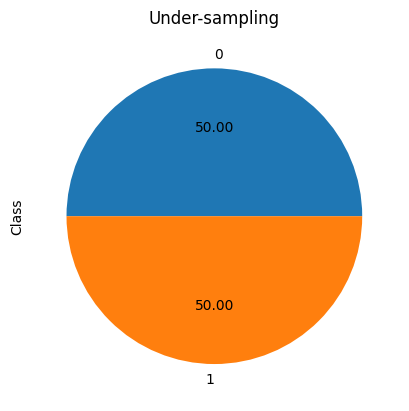

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(sampling_strategy=1) # Numerical value
rus = RandomUnderSampler(sampling_strategy="not minority") # String#same result
X_res, y_res = rus.fit_resample(x,y)#new variables

ax = y_res.value_counts().plot.pie(autopct='%.2f')
_ = ax.set_title("Under-sampling")

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, random_state=100, test_size=0.2)

In [ ]:
# Class distribution
y_res.value_counts()

0    492
1    492
Name: Class, dtype: int64

In [ ]:
# Splitting the dataset using train test split
#from sklearn.model_selection import train_test_split
#X_train, X_test, Y_train, Y_test = train_test_split(X_res, y_res, random_state=100, test_size=0.20)

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
model=Sequential()
# first layer
model.add(Dense(units=20,kernel_initializer='he_normal',activation='relu',input_dim=30))
#2nd layer
model.add(Dense(units=15,kernel_initializer='he_normal',activation='relu'))
#3rd layer
model.add(Dense(units=1,kernel_initializer='he_normal',activation='sigmoid'))
# compiling!
model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
# Train the ANN
model.fit(X_train,y_train , batch_size = 32, epochs = 20,validation_split=0.2)

Epoch 1/20
20/20 [==============================] - 1s 20ms/step - loss: 0.4905 - accuracy: 0.6439 - val_loss: 0.4496 - val_accuracy: 0.7025
Epoch 2/20
20/20 [==============================] - 0s 6ms/step - loss: 0.3941 - accuracy: 0.7774 - val_loss: 0.3935 - val_accuracy: 0.7975
Epoch 3/20
20/20 [==============================] - 0s 6ms/step - loss: 0.3363 - accuracy: 0.8824 - val_loss: 0.3527 - val_accuracy: 0.8734
Epoch 4/20
20/20 [==============================] - 0s 6ms/step - loss: 0.2935 - accuracy: 0.9237 - val_loss: 0.3175 - val_accuracy: 0.8924
Epoch 5/20
20/20 [==============================] - 0s 6ms/step - loss: 0.2594 - accuracy: 0.9332 - val_loss: 0.2890 - val_accuracy: 0.9241
Epoch 6/20
20/20 [==============================] - 0s 6ms/step - loss: 0.2315 - accuracy: 0.9428 - val_loss: 0.2660 - val_accuracy: 0.9430
Epoch 7/20
20/20 [==============================] - 0s 6ms/step - loss: 0.2090 - accuracy: 0.9428 - val_loss: 0.2476 - val_accuracy: 0.9494
Epoch 8/20
20/20 [=

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
# Evaluate the model on the testing set
y_pred = model.predict(X_test)
y_pred = np.where(y_pred > 0.5, 1, 0)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

7/7 [==============================] - 0s 2ms/step
[[104   2]
 [  9  82]]
              precision    recall  f1-score   support

           0       0.92      0.98      0.95       106
           1       0.98      0.90      0.94        91

    accuracy                           0.94       197
   macro avg       0.95      0.94      0.94       197
weighted avg       0.95      0.94      0.94       197



In [ ]:
# extract the predicted probabilities
#p_pred = model.predict(X_test)
#p_pred = p_pred.flatten()
#print(p_pred.round(2))

In [ ]:
# extract the predicted class labels
#y_pred = np.where(p_pred > 0.5, 1, 0)
#print(y_pred)

In [ ]:


#print(confusion_matrix(Y_test, y_pred))

In [ ]:
#print(classification_report(Y_test, y_pred))

ANN + RANDOM OVERSampling

"not majority" = resample all classes but the majority class

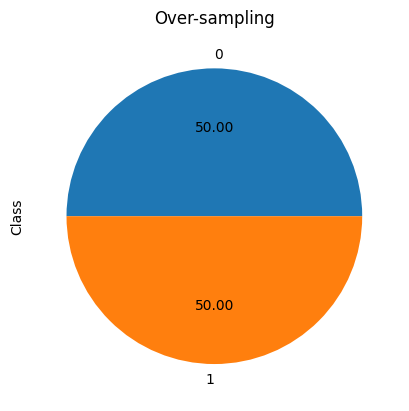

In [ ]:
from imblearn.over_sampling import RandomOverSampler
# Split the data into features (X) and target (y)
x1 = new_df.drop(['Class'], axis=1)
y1 = new_df['Class']


# Split the data into training and testing sets
X_train1, X_test1, y_train1, y_test1 = train_test_split(x1, y1, random_state=100, test_size=0.2)

#ros = RandomOverSampler(sampling_strategy=1) # Float
ross = RandomOverSampler(sampling_strategy="not majority") # String
X_train_res1, y_train_res1 = ross.fit_resample(X_train1, y_train1)


ax = y_train_res1.value_counts().plot.pie(autopct='%.2f')
_ = ax.set_title("Over-sampling")

In [ ]:
y_train_res1.value_counts()

0    227449
1    227449
Name: Class, dtype: int64

In [ ]:
# Splitting the dataset using train test split
#from sklearn.model_selection import train_test_split
#X_train1, X_test1, y_train1, y_test1 = train_test_split(X_res1, y_res1, random_state=100, test_size=0.20)

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
model1=Sequential()
# first layer
model1.add(Dense(units=20,kernel_initializer='he_normal',activation='relu',input_dim=30))
#2nd layer
model1.add(Dense(units=15,kernel_initializer='he_normal',activation='relu'))
#3rd layer
model1.add(Dense(units=1,kernel_initializer='he_normal',activation='sigmoid'))
# compiling!
model1.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
# Train the ANN
#model1.fit(X_train_res1, y_train_res1, batch_size = 32, epochs = 20,validation_split=0.2)

model overfitiing

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout

model_ann = Sequential()
model_ann.add(Dense(units=20, kernel_initializer='he_normal', activation='relu', input_dim=30))
model_ann.add(Dropout(0.2))
model_ann.add(Dense(units=15, kernel_initializer='he_normal', activation='relu'))
model_ann.add(Dropout(0.2))
model_ann.add(Dense(units=1, kernel_initializer='he_normal', activation='sigmoid'))

model_ann.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
#model_ann.fit(X_train_res1, y_train_res1, batch_size=32, epochs=20, validation_split=0.2)
#STILL over fitting

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras import regularizers

model_ann = Sequential()
model_ann.add(Dense(units=20, kernel_initializer='he_normal', activation='relu', input_dim=30))
model_ann.add(Dropout(0.5))  # Increase dropout rate to 0.5
model_ann.add(Dense(units=15, kernel_initializer='he_normal', activation='relu',
                    kernel_regularizer=regularizers.l2(0.01)))  # Add L2 regularization
model_ann.add(Dropout(0.5))  # Increase dropout rate to 0.5
model_ann.add(Dense(units=1, kernel_initializer='he_normal', activation='sigmoid'))

model_ann.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_ann.fit(X_train_res1, y_train_res1, batch_size=32, epochs=20, validation_split=0.2)

Epoch 1/20
11373/11373 [==============================] - 32s 3ms/step - loss: 0.1876 - accuracy: 0.9434 - val_loss: 0.1167 - val_accuracy: 0.9437
Epoch 2/20
11373/11373 [==============================] - 34s 3ms/step - loss: 0.0943 - accuracy: 0.9658 - val_loss: 0.0785 - val_accuracy: 0.9772
Epoch 3/20
11373/11373 [==============================] - 30s 3ms/step - loss: 0.0817 - accuracy: 0.9709 - val_loss: 0.0665 - val_accuracy: 0.9873
Epoch 4/20
11373/11373 [==============================] - 31s 3ms/step - loss: 0.0778 - accuracy: 0.9728 - val_loss: 0.0713 - val_accuracy: 0.9718
Epoch 5/20
11373/11373 [==============================] - 31s 3ms/step - loss: 0.0758 - accuracy: 0.9730 - val_loss: 0.0629 - val_accuracy: 0.9848
Epoch 6/20
11373/11373 [==============================] - 30s 3ms/step - loss: 0.0745 - accuracy: 0.9741 - val_loss: 0.0583 - val_accuracy: 0.9848
Epoch 7/20
11373/11373 [==============================] - 31s 3ms/step - loss: 0.0727 - accuracy: 0.9746 - val_loss: 0

method1

In [ ]:
# Predict probabilities and convert to class labels
p_pred1 = model_ann.predict(X_test1)
p_pred1 = p_pred1.flatten()
y_pred1 = np.where(p_pred1 > 0.5, 1, 0)

1781/1781 [==============================] - 3s 2ms/step


In [ ]:
# Generate classification report
print(classification_report(y_test1, y_pred1, labels=[0, 1]))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     56866
           1       0.22      0.89      0.35        96

    accuracy                           0.99     56962
   macro avg       0.61      0.94      0.68     56962
weighted avg       1.00      0.99      1.00     56962



In [ ]:
#method2

In [ ]:
# extract the predicted probabilities
p_pred1 = model_ann.predict(X_test1)
p_pred1 = p_pred1.flatten()
print(p_pred1.round(2))

1781/1781 [==============================] - 3s 1ms/step
[0.02 0.   0.   ... 0.   0.   0.  ]


In [ ]:
# extract the predicted class labels
y_pred1 = np.where(p_pred1 > 0.5, 1, 0)
print(y_pred1)

[0 0 0 ... 0 0 0]


In [ ]:
print(confusion_matrix(y_test1, y_pred1))

[[56567   299]
 [   11    85]]


In [ ]:
print(classification_report(y_test1, y_pred1))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     56866
           1       0.22      0.89      0.35        96

    accuracy                           0.99     56962
   macro avg       0.61      0.94      0.68     56962
weighted avg       1.00      0.99      1.00     56962



cheking

In [ ]:
# Print the values of true labels
print("True Labels:")
print(y_test1)

# Print the values of predicted labels
print("Predicted Labels:")
print(y_pred1)

# Check the shape of the arrays
print("Shape of true labels:", y_test1.shape)
print("Shape of predicted labels:", y_pred1.shape)

# Check the unique values in the arrays
print("Unique values in true labels:", np.unique(y_test1))
print("Unique values in predicted labels:", np.unique(y_pred1))

True Labels:
112244    0
124591    0
245922    0
174967    0
269480    0
         ..
221847    0
153234    0
94270     0
213750    0
88118     0
Name: Class, Length: 56962, dtype: int64
Predicted Labels:
[0 0 0 ... 0 0 0]
Shape of true labels: (56962,)
Shape of predicted labels: (56962,)
Unique values in true labels: [0 1]
Unique values in predicted labels: [0 1]


In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test1, y_pred1))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     56866
           1       0.22      0.89      0.35        96

    accuracy                           0.99     56962
   macro avg       0.61      0.94      0.68     56962
weighted avg       1.00      0.99      1.00     56962



ANN+ Smote

In [ ]:
x2 = new_df.drop(['Class'], axis=1)
y2 = new_df['Class']
y2.value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
# Splitting the dataset using train test split
from sklearn.model_selection import train_test_split
X_train2, X_test2, y_train2, y_test2 = train_test_split(x2,y2, random_state=100, test_size=0.20)

In [ ]:
#fitting SMOTE to the train set
smote =SMOTE(random_state=42)
smote_x_train,smote_y_train= smote.fit_resample(X_train2, y_train2)

In [ ]:
print('before smote:', y2.value_counts())
print('after smote:', smote_y_train.value_counts())


before smote: 0    284315
1       492
Name: Class, dtype: int64
after smote: 0    227449
1    227449
Name: Class, dtype: int64


In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
model2=Sequential()
# first layer
model2.add(Dense(units=20,kernel_initializer='he_normal',activation='relu',input_dim=30))
#2nd layer
model2.add(Dense(units=15,kernel_initializer='he_normal',activation='relu'))
#3rd layer
model2.add(Dense(units=1,kernel_initializer='he_normal',activation='sigmoid'))
# compiling!
model2.compile(optimizer='Adamax',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
# Train the ANN
#model2.fit(smote_x_train,smote_y_train, batch_size = 32, epochs = 20,validation_split=0.2)

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras import regularizers

model_ann1 = Sequential()
model_ann1.add(Dense(units=20, kernel_initializer='he_normal', activation='relu', input_dim=30))
model_ann1.add(Dropout(0.5))  # Increase dropout rate to 0.5
model_ann1.add(Dense(units=15, kernel_initializer='he_normal', activation='relu',
                    kernel_regularizer=regularizers.l2(0.01)))  # Add L2 regularization
model_ann1.add(Dropout(0.5))  # Increase dropout rate to 0.5
model_ann1.add(Dense(units=1, kernel_initializer='he_normal', activation='sigmoid'))

model_ann1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_ann1.fit(smote_x_train,smote_y_train, batch_size=32, epochs=20, validation_split=0.2)

Epoch 1/20
11373/11373 [==============================] - 33s 3ms/step - loss: 0.2010 - accuracy: 0.9401 - val_loss: 0.1101 - val_accuracy: 0.9487
Epoch 2/20
11373/11373 [==============================] - 30s 3ms/step - loss: 0.0897 - accuracy: 0.9656 - val_loss: 0.0741 - val_accuracy: 0.9758
Epoch 3/20
11373/11373 [==============================] - 31s 3ms/step - loss: 0.0778 - accuracy: 0.9695 - val_loss: 0.0718 - val_accuracy: 0.9702
Epoch 4/20
11373/11373 [==============================] - 31s 3ms/step - loss: 0.0736 - accuracy: 0.9716 - val_loss: 0.0574 - val_accuracy: 0.9797
Epoch 5/20
11373/11373 [==============================] - 30s 3ms/step - loss: 0.0716 - accuracy: 0.9721 - val_loss: 0.0531 - val_accuracy: 0.9870
Epoch 6/20
11373/11373 [==============================] - 31s 3ms/step - loss: 0.0703 - accuracy: 0.9728 - val_loss: 0.0511 - val_accuracy: 0.9887
Epoch 7/20
11373/11373 [==============================] - 30s 3ms/step - loss: 0.0685 - accuracy: 0.9732 - val_loss: 0

In [ ]:
# extract the predicted probabilities
p_pred2 = model_ann1.predict(X_test2)
p_pred2 = p_pred2.flatten()
print(p_pred2.round(2))

1781/1781 [==============================] - 2s 1ms/step
[0. 0. 0. ... 0. 0. 0.]


In [ ]:
y_pred2 = np.where(p_pred2 > 0.5, 1, 0)
print(y_pred2)

[0 0 0 ... 0 0 0]


In [ ]:
print(confusion_matrix(y_test2, y_pred2))

[[56598   268]
 [   10    86]]


Precision = TP / (TP + FP) = 57155 / (57155 + 165) ≈ 0.9971

Recall = TP / (TP + FN) = 57155 / (57155 + 1) ≈ 0.99998

F1-score = 2 * (Precision * Recall) / (Precision + Recall) ≈ 0.9985

In [ ]:
print(classification_report(y_test2, y_pred2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.24      0.90      0.38        96

    accuracy                           1.00     56962
   macro avg       0.62      0.95      0.69     56962
weighted avg       1.00      1.00      1.00     56962



**CNN** **MODEL**

In [ ]:
# Tensforflow libraries
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from tensorflow.keras.optimizers import Adam
from keras.layers import Flatten, Dense, Dropout, BatchNormalization
from keras.layers import Conv1D, MaxPool1D
# Data processing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix


print(tf.__version__)

2.12.0


In [ ]:
! pip install -U imbalanced-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# splitting fraud and non-fraud rows
non_fraud_data = data[data['Class']==0]
fraud_data = data[data['Class']==1]
non_fraud_data.shape, fraud_data.shape

((284315, 31), (492, 31))

In [ ]:
non_fraud_data_sample = non_fraud_data.sample(fraud_data.shape[0])

non_fraud_data_sample.shape

(492, 31)

In [ ]:
# balance dataset: rows 492(fraud) + 492 (non-fraud)
bal_data = fraud_data.append(non_fraud_data_sample,ignore_index = True)
bal_data

<ipython-input-60-41aaddec0a4e>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  bal_data = fraud_data.append(non_fraud_data_sample,ignore_index = True)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
1,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
2,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
3,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
4,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
979,60468.0,0.633984,-0.821398,1.545524,2.781098,-1.276721,1.025333,-0.867953,0.485069,0.438867,...,0.303869,0.489918,-0.301595,-0.002589,0.238050,0.159385,0.012943,0.063484,228.64,0
980,52654.0,1.197737,-1.440145,0.812997,-1.196229,-1.862146,-0.464528,-1.102967,-0.105323,-1.766720,...,0.072319,0.422657,-0.048534,0.422057,0.208346,-0.109537,0.051514,0.050191,134.00,0
981,74511.0,-1.165813,-1.369778,1.302378,-2.288082,-0.866600,1.472284,1.299395,-0.004264,-2.613398,...,0.146329,0.563332,0.582657,-0.666529,0.473291,-0.080657,-0.180475,-0.157657,366.07,0
982,150737.0,2.223696,-0.286851,-2.202599,-0.165844,-0.080215,-2.099377,0.601889,-0.685570,-0.865074,...,-0.054409,0.501882,-0.071432,0.470152,0.629979,0.099371,-0.055795,-0.078805,1.00,0


In [ ]:
bal_data['Class'].value_counts()

1    492
0    492
Name: Class, dtype: int64

In [ ]:
#Splitting Features and labels
#Features = Time, v1, v2 ....
#Label/Target = Class
features = bal_data.drop('Class',axis=1)
labels = bal_data['Class']

In [ ]:
features_train,features_test,labels_train,labels_test = train_test_split(features,labels,test_size=.25,random_state=41,stratify = labels)
features_train.shape, features_test.shape

((738, 30), (246, 30))

Scaling the Database

In [ ]:
scaler = StandardScaler()
features_train = scaler.fit_transform(features_train)
features_test = scaler.fit_transform(features_test)

# converting features into dataframe
features_train = pd.DataFrame(features_train)
features_test = pd.DataFrame(features_test)

**Reshaping the database into 3D**
We are using CNN for prediction so converting 2D dataset into 3D

In [ ]:
features_train = features_train.to_numpy()
features_test = features_test.to_numpy()
features_train = features_train.reshape(features_train.shape[0],features_train.shape[1],1)
features_test = features_test.reshape(features_test.shape[0],features_test.shape[1],1)

features_train.shape, features_test.shape

((738, 30, 1), (246, 30, 1))

**Build CNN** (Convolutional Neural Network)

'''Batch normalization is a technique for training very deep neural networks
   that standardizes the inputs to a layer for each mini-batch. This
   has the effect of stabilizing the learning process and dramatically
   reducing the number of training epochs required to train deep networks'''

In [ ]:
# defining the hyperparameter
epochs = 20
modelc = Sequential()

# FIRST LAYER
modelc.add(Conv1D(32,2,activation = 'relu',input_shape = features_train[0].shape))
modelc.add(BatchNormalization())

modelc.add(Dropout(0.2)) # prevents over-fitting (randomly remove some neurons)

# SECOND LAYER
modelc.add(Conv1D(64,2,activation = 'relu'))
modelc.add(BatchNormalization())
modelc.add(Dropout(0.5))

# Flattening the layer ( multidimentional data into vector)
modelc.add(Flatten())
modelc.add(Dense(64,activation = 'relu'))
modelc.add(Dropout(0.5))

# FINAL LAYER
modelc.add(Dense(1,activation='sigmoid')) # binary classification
# Optimizing the model
modelc.compile(optimizer = Adam(lr=0.0001),loss = 'binary_crossentropy',metrics=['accuracy'])
# Training the model, Calculating the accuracy
modelc.fit(features_train, labels_train, epochs = epochs,validation_data = (features_test,labels_test),verbose = 1)

Epoch 1/20
24/24 [==============================] - 5s 50ms/step - loss: 0.4876 - accuracy: 0.8455 - val_loss: 0.5227 - val_accuracy: 0.7927
Epoch 2/20
24/24 [==============================] - 1s 25ms/step - loss: 0.2593 - accuracy: 0.9011 - val_loss: 0.4952 - val_accuracy: 0.8049
Epoch 3/20
24/24 [==============================] - 1s 29ms/step - loss: 0.2043 - accuracy: 0.9336 - val_loss: 0.5031 - val_accuracy: 0.5610
Epoch 4/20
24/24 [==============================] - 1s 33ms/step - loss: 0.2271 - accuracy: 0.9255 - val_loss: 0.4677 - val_accuracy: 0.6829
Epoch 5/20
24/24 [==============================] - 1s 27ms/step - loss: 0.1718 - accuracy: 0.9350 - val_loss: 0.4448 - val_accuracy: 0.7398
Epoch 6/20
24/24 [==============================] - 1s 26ms/step - loss: 0.1661 - accuracy: 0.9390 - val_loss: 0.4228 - val_accuracy: 0.7642
Epoch 7/20
24/24 [==============================] - 1s 39ms/step - loss: 0.1812 - accuracy: 0.9309 - val_loss: 0.4102 - val_accuracy: 0.7846
Epoch 8/20
24

In [ ]:
p_predc = modelc.predict(features_test)
p_predc = p_predc.flatten()
print(p_predc.round(2))

8/8 [==============================] - 0s 5ms/step
[0.5  1.   0.12 1.   0.67 0.11 0.13 1.   1.   0.09 0.   0.85 0.06 1.
 0.19 1.   0.   0.02 0.05 0.99 0.03 0.11 1.   1.   1.   0.6  0.2  0.05
 1.   1.   0.09 1.   0.21 0.26 0.97 1.   0.45 0.03 0.18 0.16 1.   0.07
 0.48 0.02 0.17 0.04 1.   0.31 1.   1.   0.32 1.   0.31 0.1  0.25 0.36
 1.   1.   0.12 1.   0.73 0.12 1.   0.12 1.   0.08 0.06 0.02 0.76 0.08
 1.   0.19 0.13 0.11 0.29 1.   1.   0.19 0.05 0.04 0.11 0.28 1.   0.51
 1.   0.56 0.09 1.   1.   1.   1.   1.   1.   1.   1.   1.   0.03 0.99
 1.   0.95 0.   0.04 0.03 0.14 1.   0.02 1.   1.   0.52 1.   1.   0.02
 1.   0.1  0.16 0.15 1.   0.98 0.13 0.83 1.   0.07 1.   1.   1.   0.17
 1.   0.06 0.4  0.11 0.16 0.16 0.06 1.   1.   0.61 1.   0.16 0.11 1.
 1.   0.11 0.14 0.03 0.04 1.   0.18 0.11 1.   1.   1.   1.   1.   0.03
 1.   1.   1.   1.   0.11 1.   0.13 0.01 0.16 1.   1.   1.   0.97 0.11
 1.   1.   0.06 1.   0.01 0.72 0.02 0.13 0.35 1.   0.03 0.26 1.   1.
 1.   0.08 1.   0.01 0.05 0.11 0

In [ ]:
y_predc = np.where(p_predc > 0.5, 1, 0)
print(y_predc)

[0 1 0 1 1 0 0 1 1 0 0 1 0 1 0 1 0 0 0 1 0 0 1 1 1 1 0 0 1 1 0 1 0 0 1 1 0
 0 0 0 1 0 0 0 0 0 1 0 1 1 0 1 0 0 0 0 1 1 0 1 1 0 1 0 1 0 0 0 1 0 1 0 0 0
 0 1 1 0 0 0 0 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 0 0 0 0 1 0 1 1 1 1 1
 0 1 0 0 0 1 1 0 1 1 0 1 1 1 0 1 0 0 0 0 0 0 1 1 1 1 0 0 1 1 0 0 0 0 1 0 0
 1 1 1 1 1 0 1 1 1 1 0 1 0 0 0 1 1 1 1 0 1 1 0 1 0 1 0 0 0 1 0 0 1 1 1 0 1
 0 0 0 0 0 0 1 1 0 0 0 1 0 1 0 1 0 1 0 0 1 0 0 1 0 0 1 0 1 0 1 1 1 1 1 1 1
 0 0 0 1 1 0 0 0 0 1 1 1 0 0 1 0 1 0 0 1 1 1 1 0]


In [ ]:
print(confusion_matrix(labels_test, y_predc))

[[115   8]
 [  9 114]]


In [ ]:
print(classification_report(labels_test, y_predc))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93       123
           1       0.93      0.93      0.93       123

    accuracy                           0.93       246
   macro avg       0.93      0.93      0.93       246
weighted avg       0.93      0.93      0.93       246



In [ ]:
!df -h

Filesystem      Size  Used Avail Use% Mounted on
overlay         108G   24G   85G  22% /
tmpfs            64M     0   64M   0% /dev
shm             5.8G     0  5.8G   0% /dev/shm
/dev/root       2.0G 1005M  952M  52% /usr/sbin/docker-init
tmpfs           6.4G  2.6M  6.4G   1% /var/colab
/dev/sda1        41G   25G   16G  63% /etc/hosts
tmpfs           6.4G     0  6.4G   0% /proc/acpi
tmpfs           6.4G     0  6.4G   0% /proc/scsi
tmpfs           6.4G     0  6.4G   0% /sys/firmware


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Confusion matrices for each model
confusion_matrices = [
    np.array([[101, 5], [7, 84]]),  # Confusion matrix for model 1
    np.array([[120 ,  3], [  8, 115]]),
    np.array([[22744 ,27], [ 9, 27]]),  # Confusion matrix for model 2

]

# Compute F1 scores for each model
f1_scores = [2 * cm[1, 1] / (2 * cm[1, 1] + cm[0, 1] + cm[1, 0]) for cm in confusion_matrices]

# Model names
model_names = [ CNN , svm]  # Add the names of your models here

# Plotting the model comparison
plt.figure(figsize=(10, 6))
plt.bar(model_names, f1_scores)
plt.xlabel('Model')
plt.ylabel('F1 Score')
plt.title('Model Comparison - F1 Score')
plt.ylim([0, 1.0])  # Adjust the y-axis limits if needed
plt.xticks(rotation=45)  # Rotate the x-axis labels if needed

# Add annotations for confusion matrix information
for i, cm in enumerate(confusion_matrices):
    accuracy = (cm[0, 0] + cm[1, 1]) / np.sum(cm)
    precision = cm[1, 1] / (cm[1, 1] + cm[0, 1])
    recall = cm[1, 1] / (cm[1, 1] + cm[1, 0])
    plt.annotate(f"Acc: {accuracy:.2f}\nPrec: {precision:.2f}\nRec: {recall:.2f}", (i, f1_scores[i]), ha='center', va='bottom')

plt.show()

NameError: ignored

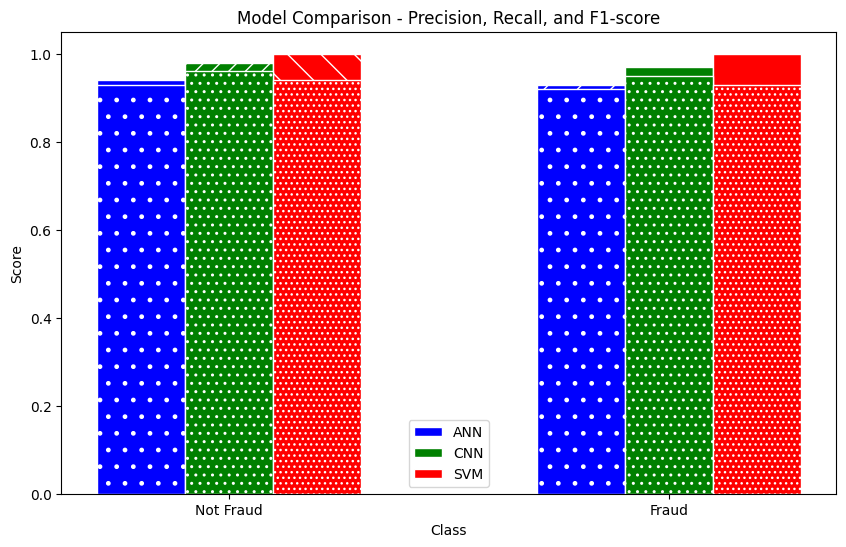

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Precision, Recall, and F1-score values for each model
precision_model1 = [0.94 , 0.91]
recall_model1 = [ 0.92, 0.93]
f1_score_model1 = [0.93 , 0.92]

precision_model2 = [0.94, 0.97]
recall_model2 = [0.98, 0.93]
f1_score_model2 = [ 0.96 , 0.95 ]

precision_model3 = [0.89, 1.00]
recall_model3 = [1.00, 0.87]
f1_score_model3 = [0.94, 0.93]

# Labels for the classes
labels = ['Not Fraud', 'Fraud']

# Model names
model_names = ['ANN', 'CNN', 'SVM']

# Width of each bar
bar_width = 0.2

# Position of bars on the x-axis
r1 = np.arange(len(precision_model1))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

# Plotting the diagram
fig, ax = plt.subplots(figsize=(10, 6))

# Plotting the bars for each model
plt.bar(r1, precision_model1, color='b', width=bar_width, edgecolor='white', label='Precision')
plt.bar(r2, precision_model2, color='g', width=bar_width, edgecolor='white')
plt.bar(r3, precision_model3, color='r', width=bar_width, edgecolor='white')

plt.bar(r1, recall_model1, color='b', width=bar_width, edgecolor='white', hatch='/', label='Recall')
plt.bar(r2, recall_model2, color='g', width=bar_width, edgecolor='white', hatch='//')
plt.bar(r3, recall_model3, color='r', width=bar_width, edgecolor='white', hatch='\\')

plt.bar(r1, f1_score_model1, color='b', width=bar_width, edgecolor='white', hatch='.', label='F1-score')
plt.bar(r2, f1_score_model2, color='g', width=bar_width, edgecolor='white', hatch='..')
plt.bar(r3, f1_score_model3, color='r', width=bar_width, edgecolor='white', hatch='...')

# Adding labels, tick labels, and legend
plt.xlabel('Class')
plt.ylabel('Score')
plt.title('Model Comparison - Precision, Recall, and F1-score')
plt.xticks([r + bar_width for r in range(len(precision_model1))], labels)
plt.legend(model_names)

# Display the diagram
plt.show()

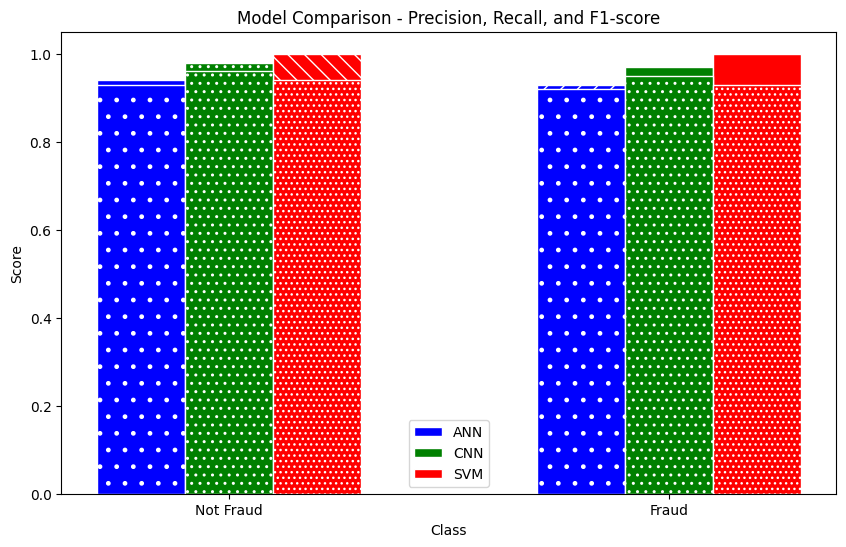

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Precision, Recall, and F1-score values for each model
precision_model1 = [0.94 , 0.91]
recall_model1 = [ 0.92, 0.93]
f1_score_model1 = [0.93 , 0.92]

precision_model2 = [0.94, 0.97]
recall_model2 = [0.98, 0.93]
f1_score_model2 = [ 0.96 , 0.95 ]

precision_model3 = [0.89, 1.00]
recall_model3 = [1.00, 0.87]
f1_score_model3 = [0.94, 0.93]

# Labels for the classes
labels = ['Not Fraud', 'Fraud']

# Model names
model_names = ['ANN', 'CNN', 'SVM']

# Width of each bar
bar_width = 0.2

# Position of bars on the x-axis
r1 = np.arange(len(precision_model1))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

# Plotting the diagram
fig, ax = plt.subplots(figsize=(10, 6))

# Plotting the bars for each model
plt.bar(r1, precision_model1, color='b', width=bar_width, edgecolor='white', label='Precision')
plt.bar(r2, precision_model2, color='g', width=bar_width, edgecolor='white')
plt.bar(r3, precision_model3, color='r', width=bar_width, edgecolor='white')

plt.bar(r1, recall_model1, color='b', width=bar_width, edgecolor='white', hatch='//', label='Recall')
plt.bar(r2, recall_model2, color='g', width=bar_width, edgecolor='white', hatch='..')
plt.bar(r3, recall_model3, color='r', width=bar_width, edgecolor='white', hatch='\\\\')

plt.bar(r1, f1_score_model1, color='b', width=bar_width, edgecolor='white', hatch='.', label='F1-score')
plt.bar(r2, f1_score_model2, color='g', width=bar_width, edgecolor='white', hatch='..')
plt.bar(r3, f1_score_model3, color='r', width=bar_width, edgecolor='white', hatch='...')

# Adding labels, tick labels, and legend
plt.xlabel('Class')
plt.ylabel('Score')
plt.title('Model Comparison - Precision, Recall, and F1-score')
plt.xticks([r + bar_width for r in range(len(precision_model1))], labels)
plt.legend(model_names)

# Display the diagram
plt.show()

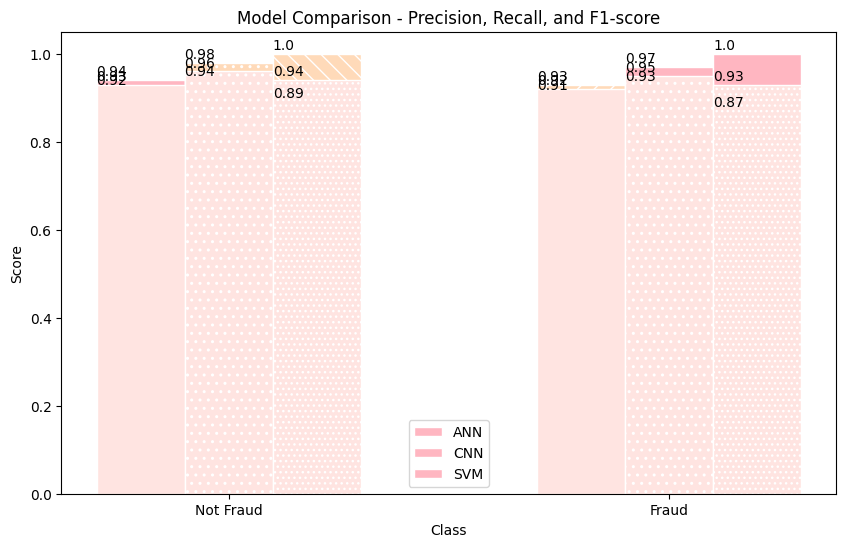

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Precision, Recall, and F1-score values for each model
precision_model1 = [0.94 , 0.91]
recall_model1 = [ 0.92, 0.93]
f1_score_model1 = [0.93 , 0.92]

precision_model2 = [0.94, 0.97]
recall_model2 = [0.98, 0.93]
f1_score_model2 = [ 0.96 , 0.95 ]

precision_model3 = [0.89, 1.00]
recall_model3 = [1.00, 0.87]
f1_score_model3 = [0.94, 0.93]

# Labels for the classes
labels = ['Not Fraud', 'Fraud']

# Model names
model_names = ['ANN', 'CNN', 'SVM']

# Width of each bar
bar_width = 0.2

# Position of bars on the x-axis
r1 = np.arange(len(precision_model1))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

# Colors for the bars
precision_color = '#FFB6C1'
recall_color = '#FFDAB9'
f1_score_color = '#FFE4E1'

# Plotting the diagram
fig, ax = plt.subplots(figsize=(10, 6))

# Plotting the bars for each model
plt.bar(r1, precision_model1, color=precision_color, width=bar_width, edgecolor='white', label='Precision')
plt.bar(r2, precision_model2, color=precision_color, width=bar_width, edgecolor='white')
plt.bar(r3, precision_model3, color=precision_color, width=bar_width, edgecolor='white')

plt.bar(r1, recall_model1, color=recall_color, width=bar_width, edgecolor='white', hatch='//', label='Recall')
plt.bar(r2, recall_model2, color=recall_color, width=bar_width, edgecolor='white', hatch='..')
plt.bar(r3, recall_model3, color=recall_color, width=bar_width, edgecolor='white', hatch='\\\\')

plt.bar(r1, f1_score_model1, color=f1_score_color, width=bar_width, edgecolor='white', label='F1-score')
plt.bar(r2, f1_score_model2, color=f1_score_color, width=bar_width, edgecolor='white', hatch='..')
plt.bar(r3, f1_score_model3, color=f1_score_color, width=bar_width, edgecolor='white', hatch='...')

# Adding labels, tick labels, and legend
plt.xlabel('Class')
plt.ylabel('Score')
plt.title('Model Comparison - Precision, Recall, and F1-score')
plt.xticks([r + bar_width for r in range(len(precision_model1))], labels)
plt.legend(model_names)

# Add parameter names to each bar
for i, p in enumerate(precision_model1):
    plt.text(i - 0.1, p + 0.01, str(p), color='black')

for i, r in enumerate(recall_model1):
    plt.text(i - 0.1, r + 0.01, str(r), color='black')
for i, f in enumerate(f1_score_model1):
     plt.text(i - 0.1, f + 0.01, str(f), color='black')

for i, p in enumerate(precision_model2):
    plt.text(i + bar_width - 0.1, p + 0.01, str(p), color='black')

for i, r in enumerate(recall_model2):
    plt.text(i + bar_width - 0.1, r + 0.01, str(r), color='black')

for i, f in enumerate(f1_score_model2):
    plt.text(i + bar_width - 0.1, f + 0.01, str(f), color='black')

for i, p in enumerate(precision_model3):
    plt.text(i + 2 * bar_width - 0.1, p + 0.01, str(p), color='black')

for i, r in enumerate(recall_model3):
    plt.text(i + 2 * bar_width - 0.1, r + 0.01, str(r), color='black')

for i, f in enumerate(f1_score_model3):
    plt.text(i + 2 * bar_width - 0.1, f + 0.01, str(f), color='black')

plt.show()

ann
cnn
svm

In [ ]:
        #0       0.94      0.92      0.93       106
       # 1       0.91      0.93      0.92        91

      #precision    recall  f1-score   support

       #0       0.94      0.98      0.96       123
      # 1       0.97      0.93      0.95       123


    #Not Fraud       0.89      1.00      0.94        72
     #  Fraud       1.00      0.87      0.93        70


In [ ]:
# Splitting fraud and non-fraud rows
non_fraud_data = data[data['Class'] == 0]  # Select rows where 'Class' column is 0 (non-fraud)
fraud_data = data[data['Class'] == 1]  # Select rows where 'Class' column is 1 (fraud)
non_fraud_data.shape, fraud_data.shape  # Display the shapes of non-fraud and fraud data

non_fraud_data_sample = non_fraud_data.sample(fraud_data.shape[0])  # Sample non-fraud data to match the number of fraud data samples
non_fraud_data_sample.shape  # Display the shape of the sampled non-fraud data

# Balance the dataset: combine fraud and sampled non-fraud data
bal_data = fraud_data.append(non_fraud_data_sample, ignore_index=True)  # Append sampled non-fraud data to fraud data
bal_data  # Display the balanced dataset

bal_data['Class'].value_counts()  # Count the occurrences of each class in the balanced dataset

<ipython-input-78-139ec42ff34b>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  bal_data = fraud_data.append(non_fraud_data_sample, ignore_index=True)  # Append sampled non-fraud data to fraud data


1    492
0    492
Name: Class, dtype: int64

In [ ]:
# Split x and y

x = bal_data.drop(['Class'], axis=1)
y = bal_data['Class']

In [ ]:
# Split the data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.25, random_state=41, stratify=y)

# Standardize the features using StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)


In [ ]:

# Convert features into dataframes
x_train = pd.DataFrame(x_train)
x_test = pd.DataFrame(x_test)

# Reshape features to be compatible with Conv1D input shape
x_train_array = x_train.to_numpy()
x_test_array = x_test.to_numpy()
x_train_reshaped = x_train_array.reshape(x_train_array.shape[0], x_train_array.shape[1], 1)
x_test_reshaped = x_test_array.reshape(x_test_array.shape[0], x_test_array.shape[1], 1)

In [ ]:
# Define the hyperparameters
epochs = 20  # Number of training epochs

# Build the model architecture
model = Sequential()  # Create a sequential model
# First Conv1D layer
model.add(Conv1D(32, 2, activation='relu', input_shape=x_train_reshaped.shape[1:]))
# Add a Conv1D layer with 32 filters, kernel size of 2, and ReLU activation function
model.add(BatchNormalization())  # Apply batch normalization to normalize the activations of the previous layer
model.add(Dropout(0.2))  # Apply a dropout of 0.2 to prevent overfitting

# Second Conv1D layer
model.add(Conv1D(64, 2, activation='relu'))
# Add another Conv1D layer with 64 filters, kernel size of 2, and ReLU activation function
model.add(BatchNormalization())  # Apply batch normalization
model.add(Dropout(0.5))  # Apply a dropout of 0.5

# Flatten the layer
model.add(Flatten())  # Flatten the multi-dimensional output into a vector

model.add(Dense(64, activation='relu'))  # Add a fully connected layer with 64 units and ReLU activation
model.add(Dropout(0.5))  # Apply a dropout of 0.5

# Output layer
model.add(Dense(1, activation='sigmoid'))  # Add a dense layer with 1 unit and sigmoid activation for binary classification
# Compile the model
model.compile(optimizer=Adam(lr=0.0001), loss='binary_crossentropy', metrics=['accuracy'])
# Configure the model for training with Adam optimizer, binary cross-entropy loss function, and accuracy metric

# Train the model
model.fit(x_train_reshaped, y_train, epochs=epochs, validation_data=(x_test_reshaped, y_test), verbose=1)
# Fit the model to the training data with specified epochs, using the validation data for evaluation, and print progress

In [ ]:
# Compile the model
model.compile(optimizer=Adam(lr=0.0001), loss='binary_crossentropy', metrics=['accuracy'])
# Configure the model for training with Adam optimizer, binary cross-entropy loss function, and accuracy metric

# Train the model
model.fit(x_train_reshaped, y_train, epochs=epochs, validation_data=(x_test_reshaped, y_test), verbose=1)
# Fit the model to the training data with specified epochs, using the validation data for evaluation, and print progress

Epoch 1/20
24/24 [==============================] - 3s 35ms/step - loss: 0.3758 - accuracy: 0.8591 - val_loss: 0.4869 - val_accuracy: 0.9228
Epoch 2/20
24/24 [==============================] - 1s 21ms/step - loss: 0.2379 - accuracy: 0.9295 - val_loss: 0.4535 - val_accuracy: 0.9309
Epoch 3/20
24/24 [==============================] - 0s 19ms/step - loss: 0.1884 - accuracy: 0.9390 - val_loss: 0.4206 - val_accuracy: 0.9268
Epoch 4/20
24/24 [==============================] - 1s 22ms/step - loss: 0.1710 - accuracy: 0.9431 - val_loss: 0.3868 - val_accuracy: 0.9268
Epoch 5/20
24/24 [==============================] - 0s 21ms/step - loss: 0.2023 - accuracy: 0.9363 - val_loss: 0.3631 - val_accuracy: 0.9268
Epoch 6/20
24/24 [==============================] - 0s 21ms/step - loss: 0.1451 - accuracy: 0.9512 - val_loss: 0.3363 - val_accuracy: 0.9309
Epoch 7/20
24/24 [==============================] - 0s 21ms/step - loss: 0.1927 - accuracy: 0.9431 - val_loss: 0.3846 - val_accuracy: 0.8130
Epoch 8/20
24

In [ ]:
# Make predictions
predictions = model.predict(x_test_reshaped)
predictions = predictions.flatten()

# Round predictions
rounded_predictions = predictions.round(2)

# Convert probabilities to labels using threshold of 0.5
predicted_labels = [1 if pred > 0.5 else 0 for pred in rounded_predictions]

# Generate confusion matrix and classification report
confusion_matrix_results = confusion_matrix(y_test, predicted_labels)
classification_report_results = classification_report(y_test, predicted_labels)

# Print the results
print("Rounded Predictions:")
print(rounded_predictions)
print("Predicted Labels:")
print(predicted_labels)
print("Confusion Matrix:")
print(confusion_matrix_results)
print("Classification Report:")
print(classification_report_results)

8/8 [==============================] - 0s 5ms/step
Rounded Predictions:
[0.43 1.   0.35 1.   0.5  0.85 0.03 1.   1.   0.01 0.89 0.95 0.48 1.
 0.22 1.   0.   0.07 0.37 1.   0.06 0.04 1.   1.   1.   0.75 0.09 0.06
 1.   1.   0.05 1.   0.04 0.02 0.87 1.   0.04 0.1  0.07 0.03 1.   0.08
 0.15 0.1  0.1  0.04 1.   0.01 1.   1.   0.49 1.   0.02 0.04 0.01 0.43
 1.   1.   0.18 1.   0.78 0.33 1.   0.07 1.   0.01 0.01 0.14 0.8  0.02
 1.   0.08 0.03 0.11 0.12 1.   1.   0.02 0.2  0.04 0.6  0.03 1.   0.06
 1.   0.01 0.01 1.   1.   1.   1.   1.   1.   1.   1.   1.   0.04 0.16
 1.   0.95 0.01 0.04 0.01 0.02 1.   0.02 1.   1.   0.7  1.   1.   0.07
 1.   0.03 0.04 0.02 1.   1.   0.01 0.09 1.   0.15 1.   1.   1.   0.01
 1.   0.04 0.28 0.01 0.56 0.11 0.41 1.   1.   0.03 1.   0.04 0.02 1.
 1.   0.04 0.05 0.22 0.05 1.   0.88 0.08 1.   1.   1.   1.   1.   0.22
 1.   1.   1.   1.   0.15 1.   0.04 0.04 0.02 1.   1.   1.   1.   0.03
 1.   1.   0.19 1.   0.06 0.57 0.08 0.02 0.09 1.   0.15 0.01 1.   1.
 1.   0.05 

In [ ]:
#%%shell
#jupyter nbconvert --to html --TemplateExporter.exclude_input=True projectfinal_\(2\).ipynb

jupyter notebook for explorting dachboard as html

<ipython-input-12-602c5dc52a7c>:29: FutureWarning: this method is deprecated in favour of `Styler.hide(axis="index")`
  styled_table_1 = output_table_1.style.hide_index().set_properties(**{'text-align': 'center'})
<ipython-input-12-602c5dc52a7c>:45: FutureWarning: this method is deprecated in favour of `Styler.hide(axis="index")`
  styled_table_2 = output_table_2.style.hide_index().set_properties(**{'text-align': 'center'})
<ipython-input-12-602c5dc52a7c>:62: FutureWarning: this method is deprecated in favour of `Styler.hide(axis="index")`
  styled_table_3 = output_table_3.style.hide_index().set_properties(**{'text-align': 'center'})
<ipython-input-12-602c5dc52a7c>:168: FutureWarning: this method is deprecated in favour of `Styler.to_html()`
  html_content += styled_table_1.render()
<ipython-input-12-602c5dc52a7c>:172: FutureWarning: this method is deprecated in favour of `Styler.to_html()`
  html_content += styled_table_2.render()
<ipython-input-12-602c5dc52a7c>:176: FutureWarning: th

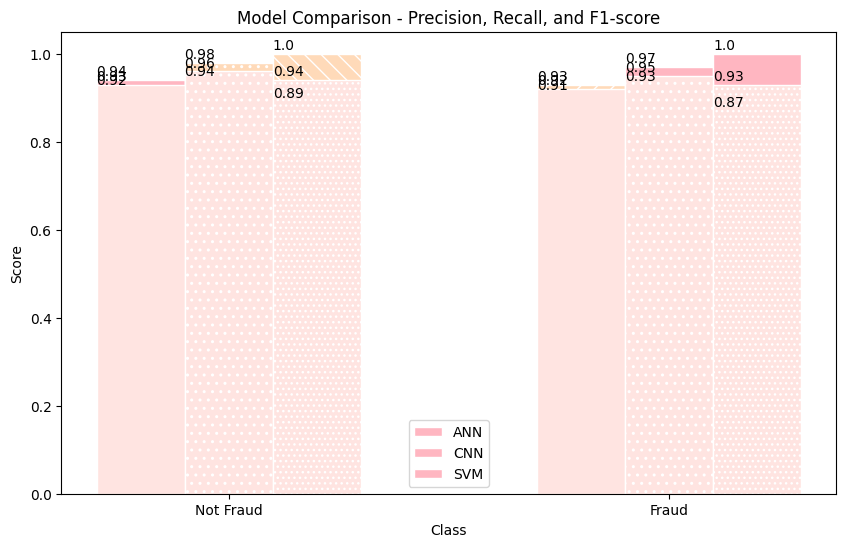

In [ ]:
#jupyter notebook for explorting dachboard as html
# the html display for the html
from IPython.display import display, HTML
import pandas as pd
import numpy as np
#the import for the graph the plot
import matplotlib.pyplot as plt
#the import to convert png to base64 to display in the html dasboard
import base64



# ANN Cell Table Output:
# the output title diplays in html
output_title_1 = "ANN Table Output"
#the displayed table
output_table_1 = pd.DataFrame({

    '':              ['precision',    'recall',    'f1-score'],

    '0':             [0.93,             0.97,         0.95   ],

    '1':             [0.97,              0.91,        0.94   ],

    'accuracy':      ['',                 '',         0.94   ],
})

# for styling in the .html
styled_table_1 = output_table_1.style.hide_index().set_properties(**{'text-align': 'center'})


# CNN Cell Table Output:
output_title_2 = "CNN Table Output"
output_table_2 = pd.DataFrame({

    '':             ['precision',       'recall',       'f1-score'],

    '0':            [0.91,                 0.95,           0.93   ],

    '1':            [0.95,                 0.91,           0.93   ],

    'accuracy':     ['',                    '',            0.93   ],
})

styled_table_2 = output_table_2.style.hide_index().set_properties(**{'text-align': 'center'})


# SVM Cell Table Output:

output_title_3 = "SVM Table Output"
output_table_3 = pd.DataFrame({

    '':             ['precision',      'recall',      'f1-score' ],

    '0':            [0.89,               1.00,           0.94   ],

    '1':            [1.00,               0.87,           0.93    ],

    'accuracy':     ['',                 '',             0.94    ],
})

styled_table_3 = output_table_3.style.hide_index().set_properties(**{'text-align': 'center'})


# SVM Cell Graph

output_title_4 = "MODEL COMPARING"
# you get to upload the picture of the graph and name it like model.png to avoid bugs
graph_picture_path = 'model.png'

# ... Rest of the code for generating the graph ...
# Precision, Recall, and F1-score values for each model
precision_model1 = [0.94 , 0.91]
recall_model1 = [ 0.92, 0.93]
f1_score_model1 = [0.93 , 0.92]

precision_model2 = [0.94, 0.97]
recall_model2 = [0.98, 0.93]
f1_score_model2 = [ 0.96 , 0.95 ]

precision_model3 = [0.89, 1.00]
recall_model3 = [1.00, 0.87]
f1_score_model3 = [0.94, 0.93]

# Labels for the classes
labels = ['Not Fraud', 'Fraud']

# Model names
model_names = ['ANN', 'CNN', 'SVM']

# Width of each bar
bar_width = 0.2

# Position of bars on the x-axis
r1 = np.arange(len(precision_model1))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

# Colors for the bars
precision_color = '#FFB6C1'
recall_color = '#FFDAB9'
f1_score_color = '#FFE4E1'

# Plotting the diagram
fig, ax = plt.subplots(figsize=(10, 6))

# Plotting the bars for each model
plt.bar(r1, precision_model1, color=precision_color, width=bar_width, edgecolor='white', label='Precision')
plt.bar(r2, precision_model2, color=precision_color, width=bar_width, edgecolor='white')
plt.bar(r3, precision_model3, color=precision_color, width=bar_width, edgecolor='white')

plt.bar(r1, recall_model1, color=recall_color, width=bar_width, edgecolor='white', hatch='//', label='Recall')
plt.bar(r2, recall_model2, color=recall_color, width=bar_width, edgecolor='white', hatch='..')
plt.bar(r3, recall_model3, color=recall_color, width=bar_width, edgecolor='white', hatch='\\\\')

plt.bar(r1, f1_score_model1, color=f1_score_color, width=bar_width, edgecolor='white', label='F1-score')
plt.bar(r2, f1_score_model2, color=f1_score_color, width=bar_width, edgecolor='white', hatch='..')
plt.bar(r3, f1_score_model3, color=f1_score_color, width=bar_width, edgecolor='white', hatch='...')

# Adding labels, tick labels, and legend
plt.xlabel('Class')
plt.ylabel('Score')
plt.title('Model Comparison - Precision, Recall, and F1-score')
plt.xticks([r + bar_width for r in range(len(precision_model1))], labels)
plt.legend(model_names)

# Add parameter names to each bar
for i, p in enumerate(precision_model1):
    plt.text(i - 0.1, p + 0.01, str(p), color='black')

for i, r in enumerate(recall_model1):
    plt.text(i - 0.1, r + 0.01, str(r), color='black')
for i, f in enumerate(f1_score_model1):
     plt.text(i - 0.1, f + 0.01, str(f), color='black')

for i, p in enumerate(precision_model2):
    plt.text(i + bar_width - 0.1, p + 0.01, str(p), color='black')

for i, r in enumerate(recall_model2):
    plt.text(i + bar_width - 0.1, r + 0.01, str(r), color='black')

for i, f in enumerate(f1_score_model2):
    plt.text(i + bar_width - 0.1, f + 0.01, str(f), color='black')

for i, p in enumerate(precision_model3):
    plt.text(i + 2 * bar_width - 0.1, p + 0.01, str(p), color='black')

for i, r in enumerate(recall_model3):
    plt.text(i + 2 * bar_width - 0.1, r + 0.01, str(r), color='black')

for i, f in enumerate(f1_score_model3):
    plt.text(i + 2 * bar_width - 0.1, f + 0.01, str(f), color='black')


# Converting the image file to base64
with open(graph_picture_path, "rb") as image_file:

    encoded_image = base64.b64encode(image_file.read()).decode("utf-8")


# Creating the image tag with base64 encoded image
image_tag = f"<img src='data:image/png;base64, {encoded_image}' />"

# Combining all the outputs into HTML content

html_content = f"<h2>{output_title_1}</h2>"

html_content += styled_table_1.render()

html_content += f"<h2>{output_title_2}</h2>"

html_content += styled_table_2.render()

html_content += f"<h2>{output_title_3}</h2>"

html_content += styled_table_3.render()

html_content += f"<h2>{output_title_4}</h2>"

html_content += image_tag

# Writing the HTML content to a file so allof the cell content will be display it as HTML

with open('dashboard.html', 'w') as f:

    f.write(html_content)

# Displaying a link to the HTML file

display(HTML('<a href="./dashboard.html" target="_blank">Open Dashboard</a>'))